# PISA 2012 Data Exploration

### by Vasilij Laparidi

## Table of Contents
<ul>
<li><a href="#prelim">Preliminary Wrangling</a></li>
<li><a href="#wrang">Data Wrangling</a></li>
<li><a href="#explorat">Exploratory Data Analysis</a></li>
    <ul>
        <li><a href="#univar">Univariate Exploration</a></li>
        <li><a href="#bivar">Bivariate Exploration</a></li>
        <li><a href="#multivar">Multivariate Exploration</a></li>
    </ul>
<li><a href="#conclus">Conclusions</a></li>
</ul>

## Preliminary Wrangling

First we check the data set to become familiar with it. Then we can decide which columns and rows we need to clean up and use for the analysis.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe, print statistics
pisa = pd.read_csv('pisa2012.csv', encoding='latin-1', low_memory = False)

In [3]:
pisa.shape

(485490, 636)

In [4]:
pd.set_option('display.max_rows', 636)
pd.set_option('display.max_columns', 636)

In [5]:
pisa.head(3)

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,ST03Q02,ST04Q01,ST05Q01,ST06Q01,ST07Q01,ST07Q02,ST07Q03,ST08Q01,ST09Q01,ST115Q01,ST11Q01,ST11Q02,ST11Q03,ST11Q04,ST11Q05,ST11Q06,ST13Q01,ST14Q01,ST14Q02,ST14Q03,ST14Q04,ST15Q01,ST17Q01,ST18Q01,ST18Q02,ST18Q03,ST18Q04,ST19Q01,ST20Q01,ST20Q02,ST20Q03,ST21Q01,ST25Q01,ST26Q01,ST26Q02,ST26Q03,ST26Q04,ST26Q05,ST26Q06,ST26Q07,ST26Q08,ST26Q09,ST26Q10,ST26Q11,ST26Q12,ST26Q13,ST26Q14,ST26Q15,ST26Q16,ST26Q17,ST27Q01,ST27Q02,ST27Q03,ST27Q04,ST27Q05,ST28Q01,ST29Q01,ST29Q02,ST29Q03,ST29Q04,ST29Q05,ST29Q06,ST29Q07,ST29Q08,ST35Q01,ST35Q02,ST35Q03,ST35Q04,ST35Q05,ST35Q06,ST37Q01,ST37Q02,ST37Q03,ST37Q04,ST37Q05,ST37Q06,ST37Q07,ST37Q08,ST42Q01,ST42Q02,ST42Q03,ST42Q04,ST42Q05,ST42Q06,ST42Q07,ST42Q08,ST42Q09,ST42Q10,ST43Q01,ST43Q02,ST43Q03,ST43Q04,ST43Q05,ST43Q06,ST44Q01,ST44Q03,ST44Q04,ST44Q05,ST44Q07,ST44Q08,ST46Q01,ST46Q02,ST46Q03,ST46Q04,ST46Q05,ST46Q06,ST46Q07,ST46Q08,ST46Q09,ST48Q01,ST48Q02,ST48Q03,ST48Q04,ST48Q05,ST49Q01,ST49Q02,ST49Q03,ST49Q04,ST49Q05,ST49Q06,ST49Q07,ST49Q09,ST53Q01,ST53Q02,ST53Q03,ST53Q04,ST55Q01,ST55Q02,ST55Q03,ST55Q04,ST57Q01,ST57Q02,ST57Q03,ST57Q04,ST57Q05,ST57Q06,ST61Q01,ST61Q02,ST61Q03,ST61Q04,ST61Q05,ST61Q06,ST61Q07,ST61Q08,ST61Q09,ST62Q01,ST62Q02,ST62Q03,ST62Q04,ST62Q06,ST62Q07,ST62Q08,ST62Q09,ST62Q10,ST62Q11,ST62Q12,ST62Q13,ST62Q15,ST62Q16,ST62Q17,ST62Q19,ST69Q01,ST69Q02,ST69Q03,ST70Q01,ST70Q02,ST70Q03,ST71Q01,ST72Q01,ST73Q01,ST73Q02,ST74Q01,ST74Q02,ST75Q01,ST75Q02,ST76Q01,ST76Q02,ST77Q01,ST77Q02,ST77Q04,ST77Q05,ST77Q06,ST79Q01,ST79Q02,ST79Q03,ST79Q04,ST79Q05,ST79Q06,ST79Q07,ST79Q08,ST79Q10,ST79Q11,ST79Q12,ST79Q15,ST79Q17,ST80Q01,ST80Q04,ST80Q05,ST80Q06,ST80Q07,ST80Q08,ST80Q09,ST80Q10,ST80Q11,ST81Q01,ST81Q02,ST81Q03,ST81Q04,ST81Q05,ST82Q01,ST82Q02,ST82Q03,ST83Q01,ST83Q02,ST83Q03,ST83Q04,ST84Q01,ST84Q02,ST84Q03,ST85Q01,ST85Q02,ST85Q03,ST85Q04,ST86Q01,ST86Q02,ST86Q03,ST86Q04,ST86Q05,ST87Q01,ST87Q02,ST87Q03,ST87Q04,ST87Q05,ST87Q06,ST87Q07,ST87Q08,ST87Q09,ST88Q01,ST88Q02,ST88Q03,ST88Q04,ST89Q02,ST89Q03,ST89Q04,ST89Q05,ST91Q01,ST91Q02,ST91Q03,ST91Q04,ST91Q05,ST91Q06,ST93Q01,ST93Q03,ST93Q04,ST93Q06,ST93Q07,ST94Q05,ST94Q06,ST94Q09,ST94Q10,ST94Q14,ST96Q01,ST96Q02,ST96Q03,ST96Q05,ST101Q01,ST101Q02,ST101Q03,ST101Q05,ST104Q01,ST104Q04,ST104Q05,ST104Q06,IC01Q01,IC01Q02,IC01Q03,IC01Q04,IC01Q05,IC01Q06,IC01Q07,IC01Q08,IC01Q09,IC01Q10,IC01Q11,IC02Q01,IC02Q02,IC02Q03,IC02Q04,IC02Q05,IC02Q06,IC02Q07,IC03Q01,IC04Q01,IC05Q01,IC06Q01,IC07Q01,IC08Q01,IC08Q02,IC08Q03,IC08Q04,IC08Q05,IC08Q06,IC08Q07,IC08Q08,IC08Q09,IC08Q11,IC09Q01,IC09Q02,IC09Q03,IC09Q04,IC09Q05,IC09Q06,IC09Q07,IC10Q01,IC10Q02,IC10Q03,IC10Q04,IC10Q05,IC10Q06,IC10Q07,IC10Q08,IC10Q09,IC11Q01,IC11Q02,IC11Q03,IC11Q04,IC11Q05,IC11Q06,IC11Q07,IC22Q01,IC22Q02,IC22Q04,IC22Q06,IC22Q07,IC22Q08,EC01Q01,EC02Q01,EC03Q01,EC03Q02,EC03Q03,EC03Q04,EC03Q05,EC03Q06,EC03Q07,EC03Q08,EC03Q09,EC03Q10,EC04Q01A,EC04Q01B,EC04Q01C,EC04Q02A,EC04Q02B,EC04Q02C,EC04Q03A,EC04Q03B,EC04Q03C,EC04Q04A,EC04Q04B,EC04Q04C,EC04Q05A,EC04Q05B,EC04Q05C,EC04Q06A,EC04Q06B,EC04Q06C,EC05Q01,EC06Q01,EC07Q01,EC07Q02,EC07Q03,EC07Q04,EC07Q05,EC08Q01,EC08Q02,EC08Q03,EC08Q04,EC09Q03,EC10Q01,EC11Q02,EC11Q03,EC12Q01,ST22Q01,ST23Q01,ST23Q02,ST23Q03,ST23Q04,ST23Q05,ST23Q06,ST23Q07,ST23Q08,ST24Q01,ST24Q02,ST24Q03,CLCUSE1,CLCUSE301,CLCUSE302,DEFFORT,QUESTID,BOOKID,EASY,AGE,GRADE,PROGN,ANXMAT,ATSCHL,ATTLNACT,BELONG,BFMJ2,BMMJ1,CLSMAN,COBN_F,COBN_M,COBN_S,COGACT,CULTDIST,CULTPOS,DISCLIMA,ENTUSE,ESCS,EXAPPLM,EXPUREM,FAILMAT,FAMCON,FAMCONC,FAMSTRUC,FISCED,HEDRES,HERITCUL,HISCED,HISEI,HOMEPOS,HOMSCH,HOSTCUL,ICTATTNEG,ICTATTPOS,ICTHOME,ICTRES,ICTSCH,IMMIG,INFOCAR,INFOJOB1,INFOJOB2,INSTMOT,INTMAT,ISCEDD,ISCEDL,ISCEDO,LANGCOMM,LANGN,LANGRPPD,LMINS,MATBEH,MATHEFF,MATINTFC,MATWKETH,MISCED,MMINS,MTSUP,OCOD1,OCOD2,OPENPS,OUTHOURS,PARED,PERSEV,REPEAT,SCMAT,SMINS,STUDREL,SUBNORM,TCHBEHFA,TCHBEHSO,TCHBEHTD,TEACHSUP,TESTLANG,TIMEINT,USEMATH,USESCH,WEALTH,ANCATSCHL,ANCATTLNACT,ANCBELONG,ANCCLSMAN,ANCCOGACT,ANCINSTMOT,ANCINTMAT,ANCMATWKETH,ANCMTSUP,ANCSCMAT,ANCSTUD

#### What is the structure of your dataset?

there are 485490 rows and 636 columns in the dataset. We can state that the data set is very large and contains a lot of information. Therefore we will limit ourselves to certain data points to answer the following questions:



1. The comparison of the results of the individual countries.
2. The comparison of the results by age group.
3. The comparison of the results by sex.
4. The comparison of the results in terms of family relations. And their impact on those outcomes.
5. The comparison of the results with regard to the migration background. And their influence on these results.
6. The comparison of the results with regard to the cultural background of the parents. And their influence on these results.


We will also analyze the generell distribution of some of this datapoints.


In [6]:
pisa = pisa[['CNT', 'AGE', 'ST04Q01', 'ST11Q01', 'ST11Q02',
         'PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV1READ', 'PV2READ', 'PV3READ', 'PV4READ', 'PV5READ', 
         'PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE', 'COBN_F',  'COBN_M',  'COBN_S', 'IMMIG']]

In [7]:
pisa.head(3)

,CNT,AGE,ST04Q01,ST11Q01,ST11Q02,PV1MATH,PV2MATH,PV3MATH,PV4MATH,PV5MATH,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,COBN_F,COBN_M,COBN_S,IMMIG
0,Albania,16.17,Female,Yes,Yes,406.8469,376.4683,344.5319,321.1637,381.9209,249.5762,254.3420,406.8496,175.7053,218.5981,341.7009,408.8400,348.2283,367.8105,392.9877,Albania,Albania,Albania,Native
1,Albania,16.17,Female,Yes,Yes,486.1427,464.3325,453.4273,472.9008,476.0165,406.2936,349.8975,400.7334,369.7553,396.7618,548.9929,471.5964,471.5964,443.6218,454.8116,Albania,Albania,Albania,Native
2,Albania,15.58,Female,Yes,Yes,533.2684,481.0796,489.6479,490.4269,533.2684,401.2100,404.3872,387.7067,431.3938,401.2100,499.6643,428.7952,492.2044,512.7191,499.6643,Albania,Albania,Albania,Native


## Data Wrangling

First we create an average for the results of the students for each individual discipline.

In [8]:
# compute the avg. scores
pisa['Avg. Math Score'] = (pisa['PV1MATH'] + pisa['PV2MATH'] + pisa['PV3MATH'] + pisa['PV4MATH'] + pisa['PV5MATH']) / 5
pisa['Avg. Reading Score'] = (pisa['PV1READ'] + pisa['PV2READ'] + pisa['PV3READ'] + pisa['PV4READ'] + pisa['PV5READ']) / 5
pisa['Avg. Science Score'] = (pisa['PV1SCIE'] + pisa['PV2SCIE'] + pisa['PV3SCIE'] + pisa['PV4SCIE'] + pisa['PV5SCIE']) / 5

# drop unnecessary columns
pisa.drop(columns = ['PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV1READ', 'PV2READ', 'PV3READ', 'PV4READ', 
                   'PV5READ','PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE'], inplace = True)

To be able to work with the data set more easily, we will now rename the columns.

In [9]:
pisa.rename({'CNT' : 'Country Code', 'ST03Q02' : 'Year of Birth', 'ST04Q01' : 'Sex', 'ST11Q01': 'Mother at Home', 'ST11Q02': 'Father at Home', 'AGE' : 'Age', 'COBN_F' : 'Country of Birth Father', 
           'COBN_M' : 'Country of Birth Mother', 'COBN_S' : 'Country of Birth Child', 'IMMIG' : 'Immigration Status'}, axis = 'columns', inplace = True)

In [10]:
pisa.head()

,Country Code,Age,Sex,Mother at Home,Father at Home,Country of Birth Father,Country of Birth Mother,Country of Birth Child,Immigration Status,Avg. Math Score,Avg. Reading Score,Avg. Science Score
0,Albania,16.17,Female,Yes,Yes,Albania,Albania,Albania,Native,366.18634,261.01424,371.91348
1,Albania,16.17,Female,Yes,Yes,Albania,Albania,Albania,Native,470.56396,384.68832,478.12382
2,Albania,15.58,Female,Yes,Yes,Albania,Albania,Albania,Native,505.53824,405.18154,486.60946
3,Albania,15.67,Female,Yes,Yes,Albania,Albania,Albania,Native,449.45476,477.46376,453.97240
4,Albania,15.50,Female,Yes,Yes,Albania,Albania,Albania,Native,385.50398,256.01010,367.15778


In [11]:
pisa.shape

(485490, 12)

In [12]:
pisa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Country Code             485490 non-null  object 
 1   Age                      485374 non-null  float64
 2   Sex                      485490 non-null  object 
 3   Mother at Home           460559 non-null  object 
 4   Father at Home           441036 non-null  object 
 5   Country of Birth Father  481825 non-null  object 
 6   Country of Birth Mother  481843 non-null  object 
 7   Country of Birth Child   481836 non-null  object 
 8   Immigration Status       471793 non-null  object 
 9   Avg. Math Score          485490 non-null  float64
 10  Avg. Reading Score       485490 non-null  float64
 11  Avg. Science Score       485490 non-null  float64
dtypes: float64(4), object(8)
memory usage: 44.4+ MB


In [13]:
pisa['Mother at Home'].value_counts()

Yes    433007
No      27552
Name: Mother at Home, dtype: int64

In [14]:
pisa['Father at Home'].value_counts()

Yes    372161
No      68875
Name: Father at Home, dtype: int64

To be able to analyze the two columns "Mother at Home" and "Fatther at Home" better, we will divide the content binary into 1 = yes and 0 = no. If data is missing, we make the assumption that NaN = Yes.

In [15]:
#Mother Father at Home in 1 und 0 ändern
#Annahme: wenn NaN = Yes

pisa['Mother at Home'].fillna('Yes', inplace=True)
pisa['Mother at Home'].replace({'No': 0, 'Yes': 1}, inplace=True)
pisa['Father at Home'].fillna('Yes', inplace=True)
pisa['Father at Home'].replace({'No': 0, 'Yes': 1}, inplace=True);

Let's check 'Immigration Status' a little bit more. 

In [16]:
pisa['Immigration Status'].value_counts()

Native               417347
Second-Generation     28268
First-Generation      26178
Name: Immigration Status, dtype: int64

Some Data in 'Immigration Status' is missing. We make the assumption that NaN = Native. Because it is the clear majority in the data set.

In [17]:
pisa['Immigration Status'].fillna('Native', inplace=True)

We would like to be able to make some statements regarding the influence of cultural homogeneity of the family on the grades. Therefore we are creating a new column "Cultural Background".

In [18]:
pisa['Cultural Background'] = (pisa['Country of Birth Mother'] == pisa['Country of Birth Father'])
pisa.loc[pisa['Cultural Background'] == True, 'Cultural Background'] = 'Homogeneous'
pisa.loc[pisa['Cultural Background'] == False, 'Cultural Background'] = 'Heterogeneous'

In [19]:
pisa.drop(columns = ['Country of Birth Father', 'Country of Birth Mother', 'Country of Birth Child'], inplace = True)

Let's check our dataframe again.

In [20]:
pisa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Country Code         485490 non-null  object 
 1   Age                  485374 non-null  float64
 2   Sex                  485490 non-null  object 
 3   Mother at Home       485490 non-null  int64  
 4   Father at Home       485490 non-null  int64  
 5   Immigration Status   485490 non-null  object 
 6   Avg. Math Score      485490 non-null  float64
 7   Avg. Reading Score   485490 non-null  float64
 8   Avg. Science Score   485490 non-null  float64
 9   Cultural Background  485490 non-null  object 
dtypes: float64(4), int64(2), object(4)
memory usage: 37.0+ MB


In [21]:
pisa.head()

,Country Code,Age,Sex,Mother at Home,Father at Home,Immigration Status,Avg. Math Score,Avg. Reading Score,Avg. Science Score,Cultural Background
0,Albania,16.17,Female,1,1,Native,366.18634,261.01424,371.91348,Homogeneous
1,Albania,16.17,Female,1,1,Native,470.56396,384.68832,478.12382,Homogeneous
2,Albania,15.58,Female,1,1,Native,505.53824,405.18154,486.60946,Homogeneous
3,Albania,15.67,Female,1,1,Native,449.45476,477.46376,453.97240,Homogeneous
4,Albania,15.50,Female,1,1,Native,385.50398,256.01010,367.15778,Homogeneous


This seems clean enough for us.

In [22]:
pisa.to_csv('pisa_data_clean.csv')

## Exploratory Data Analysis

In [23]:
pisa_clean = pd.read_csv('pisa_data_clean.csv')

### Univariate Exploration


#### 1. Analysis

Let's check the distribution of the results.

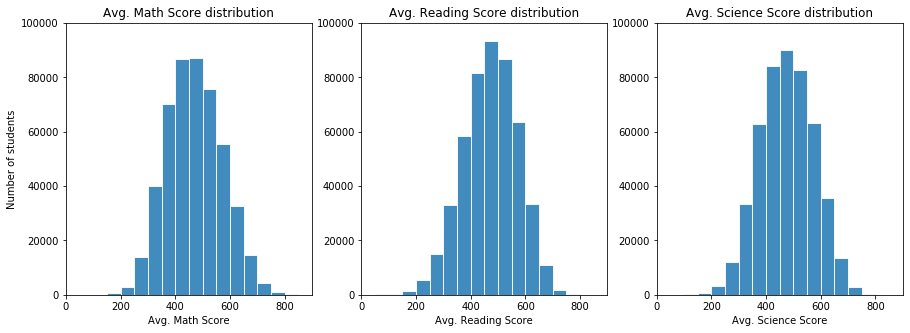

In [24]:

plt.figure(figsize = [15,5])
bins = np.arange(0, 900, 50)

plt.subplot(1, 3, 1)
plt.hist(pisa_clean['Avg. Math Score'], bins = bins, ec = 'white', alpha = 0.85);

plt.xlim(0, 900);
plt.ylim(0, 100000 + 1);
plt.xticks()
plt.xlabel('Avg. Math Score');
plt.ylabel('Number of students')
plt.title("Avg. Math Score distribution");

plt.subplot(1, 3, 2)
plt.hist(pisa_clean['Avg. Reading Score'], bins = bins, ec = 'white', alpha = 0.85);

plt.xlim(0, 900);
plt.ylim(0, 100000 + 1);
plt.xticks()
plt.xlabel('Avg. Reading Score');
plt.title("Avg. Reading Score distribution");

plt.subplot(1, 3, 3)
plt.hist(pisa_clean['Avg. Science Score'], bins = bins, ec = 'white', alpha = 0.85);

plt.xlim(0, 900);
plt.ylim(0, 100000 + 1);
plt.xticks()
plt.xlabel('Avg. Science Score');
plt.title("Avg. Science Score distribution");


The results seem to be normally distributed.

#### 2. Analysis

Now let's check the distributation of students by country code.

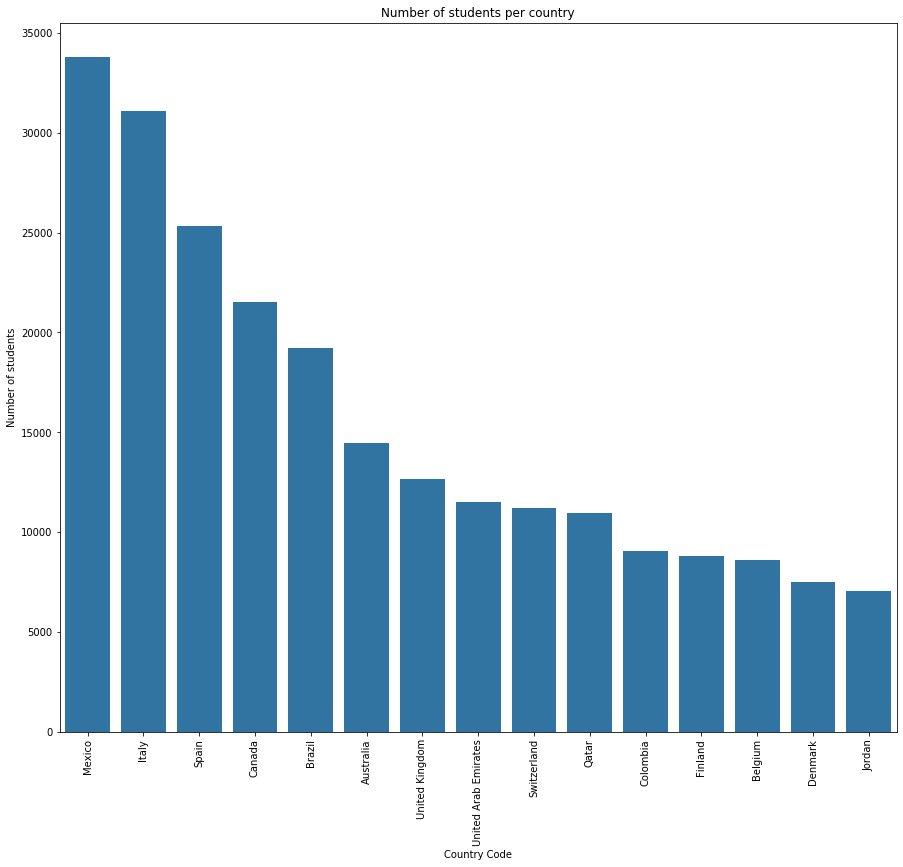

In [25]:
plt.figure(figsize = [15, 60])
base_color = sb.color_palette()[0]

plt.subplot(4, 1, 1)
sb.countplot(data = pisa_clean, x = 'Country Code', color = base_color, order=pisa_clean['Country Code'].value_counts().index[:15])
plt.title('Number of students per country')
plt.ylabel('Number of students')
plt.xticks(rotation=90);


Mexico has the most students who participated in PISA. Italy, Spain and Canada, ... follow.

#### 3. Analysis

How are the age groups distributed, and did more boys or more girls participate?

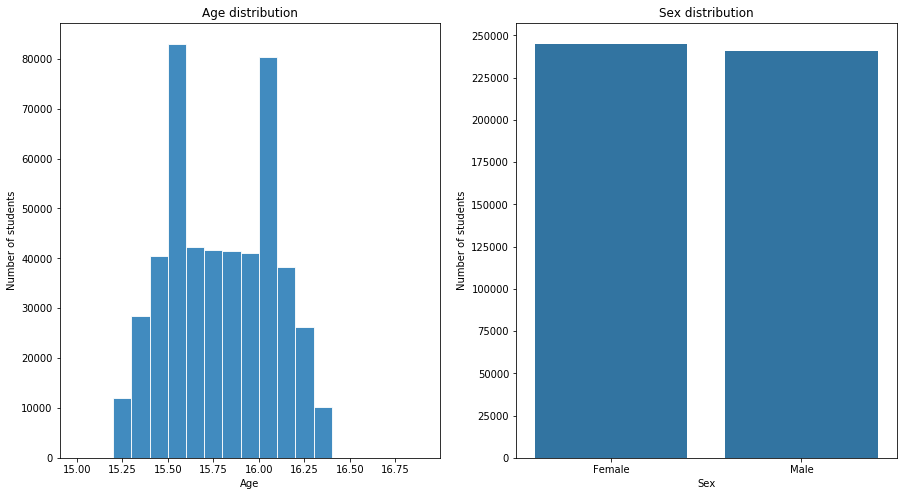

In [26]:
plt.figure(figsize=[15, 8]);
bins_age = np.arange(15, 17, 0.1)

plt.subplot(1, 2, 1)

plt.hist(pisa_clean['Age'], bins = bins_age, ec = 'white', alpha = 0.85);
plt.xlabel('Age');
plt.ylabel('Number of students')
plt.title("Age distribution");



plt.subplot(1, 2, 2);
sb.countplot(x = 'Sex', data = pisa_clean, color = sb.color_palette()[0]);

y_ticks = np.arange(0, 250000 + 1, 25000)
plt.yticks(y_ticks, y_ticks);
plt.ylabel("Number of students");
plt.title('Sex distribution');


Age is distributed from 15.17 till 16.33 with 15.78 as the mean age. 
The sexes also seem to be relatively equally up. This means that there is no possible bias regarding the gender in the data set.



#### 4. Analysis

Distribution of the family relation. First we have to catogerize the family relations in term of how many parents are at home. "Zero" for 0 Parents (no mother, no father), "One" for 1 Parent (mother OR father) and "Two" for 2 Parents (mother AND father)

In [27]:
pisa_clean['Parent at Home'] = pisa_clean['Father at Home'] + pisa_clean['Mother at Home']
pisa_clean['Parent at Home'] = pisa_clean['Parent at Home'].replace({0: 'Zero', 1: 'One', 2: 'Two'})

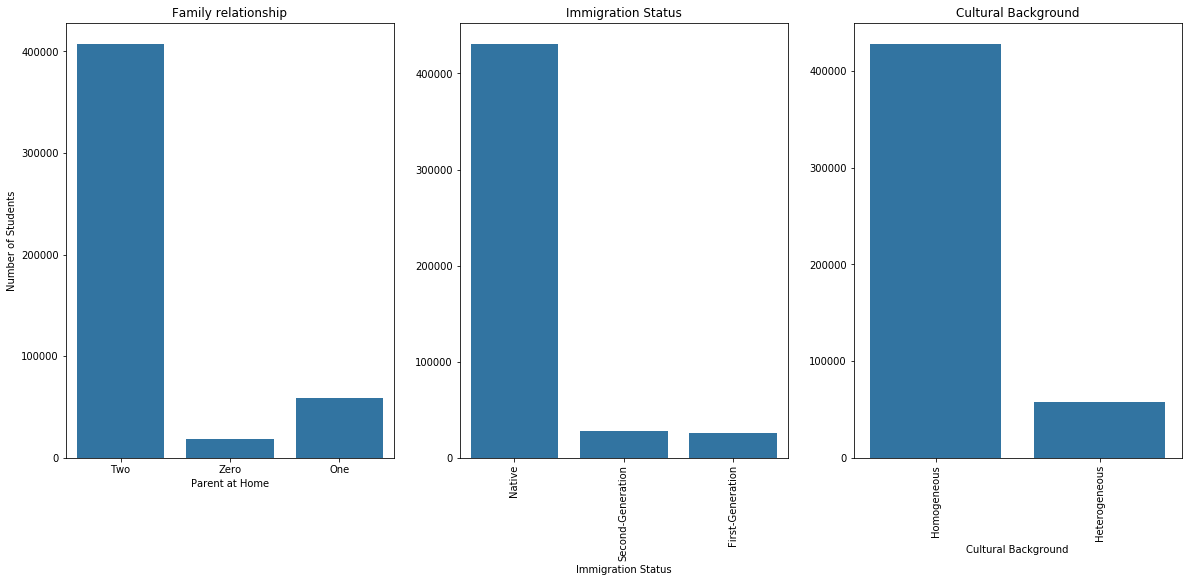

In [28]:
plt.figure(figsize=[20, 8]);
y_ticks = np.arange(0, 450000 + 1, 100000)

plt.subplot(1, 3, 1, )

sb.countplot(x = 'Parent at Home', data = pisa_clean, color = sb.color_palette()[0]);

plt.yticks(y_ticks, y_ticks);
plt.ylabel("Number of Students");
plt.title('Family relationship');

plt.subplot(1, 3, 2)

sb.countplot(x = 'Immigration Status', data = pisa_clean, color = sb.color_palette()[0]);
plt.yticks(y_ticks, y_ticks);
plt.ylabel("");
plt.title('Immigration Status');
plt.xticks(rotation=90)

plt.subplot(1, 3, 3)

sb.countplot(x = 'Cultural Background', data = pisa_clean, color = sb.color_palette()[0]);
plt.yticks(y_ticks, y_ticks);
plt.ylabel("");
plt.title('Cultural Background');
plt.xticks(rotation=90);



The proportion of families with both parents massively exceeds that with only one or two parents. 

## Bivariate Exploration

#### 5. Analysis

Now we want to compare the results of the individual subjects by age.

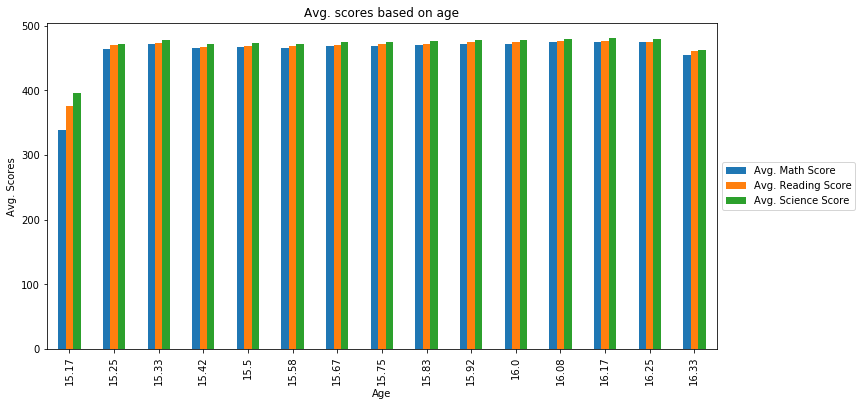

In [29]:
age_groupby = pisa_clean.groupby(['Age']).mean()[['Avg. Math Score', 'Avg. Reading Score', 'Avg. Science Score']]
f = plt.figure(figsize=[12, 6])
plt.ylabel('Avg. Scores')
plt.title('Avg. scores based on age')
age_groupby.plot(kind='bar', ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show();

We can see that the results do not differ significantly among the age groups. Except on the two edges of the graph. From this it could be deduced that pupils at the age of "15.17" took the Pisa test too early.

#### 6. Analysis

Now we want to compare the results of the individual subjects by sex.

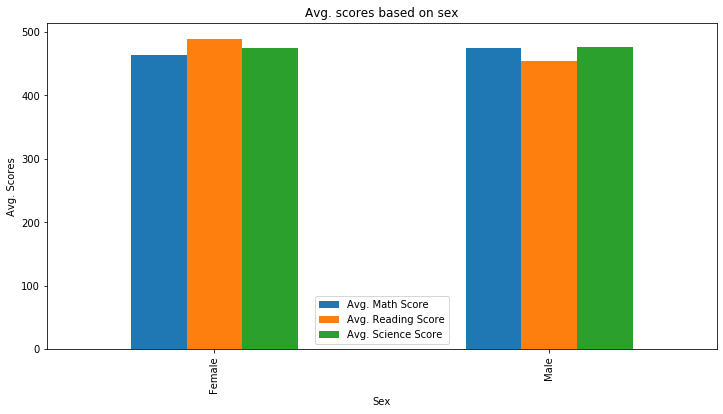

In [30]:
sex_groupby = pisa_clean.groupby(['Sex']).mean()[['Avg. Math Score', 'Avg. Reading Score', 'Avg. Science Score']]
f = plt.figure(figsize=[12, 6])
plt.ylabel('Avg. Scores')
plt.title('Avg. scores based on sex')
sex_groupby.plot(kind='bar', ax=f.gca())

plt.show();

We can see that girls and boys are almost equally up in the science scores. However, there is a difference in math and reading scores. Girls seem to have better results in reading and boys in math.

#### 7. Analysis

What part of the results does the presence of the parents play in the results?

In [31]:
pisa_clean['Parent at Home'].value_counts()

Two     407696
One      59161
Zero     18633
Name: Parent at Home, dtype: int64

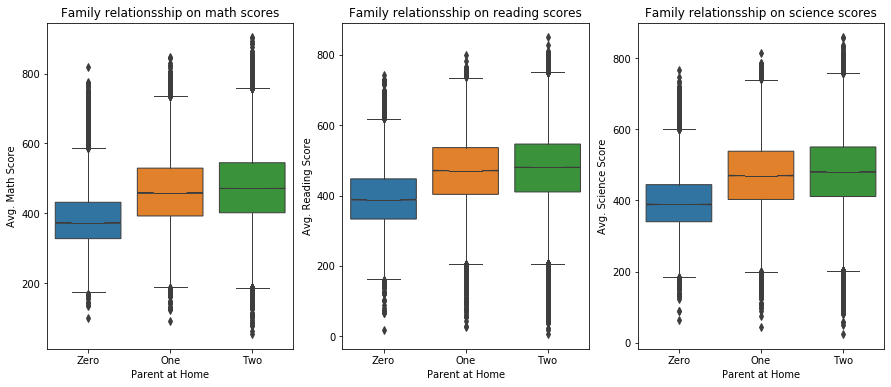

In [32]:
plt.figure(figsize = [15, 6])

order = ['Zero', 'One', 'Two']
plt.subplot(1, 3, 1)
sb.boxplot(x = pisa_clean['Parent at Home'], y = pisa_clean['Avg. Math Score'], order=order, notch=True, width=0.8,
           linewidth=1);
plt.title('Family relationsship on math scores');

plt.subplot(1, 3, 2)
sb.boxplot(x = pisa_clean['Parent at Home'], y = pisa_clean['Avg. Reading Score'], order=order, notch=True, width=0.8,
           linewidth=1);
plt.title('Family relationsship on reading scores');

plt.subplot(1, 3, 3)
sb.boxplot(x = pisa_clean['Parent at Home'], y = pisa_clean['Avg. Science Score'], order=order, notch=True, width=0.8,
           linewidth=1);
plt.title('Family relationsship on science scores');

We can see that the family seems to have a strong influence on the students' performance. Especially for students without parents in the home, the average performance drops significantly. With only one parent in the house this is not as noticeable, but the average is still slightly lower than for students with two parents in the house.

#### 8. Analysis

How strongly are the results of the PISA study influenced by the migration background. Is one more disadvantaged with a migration background?

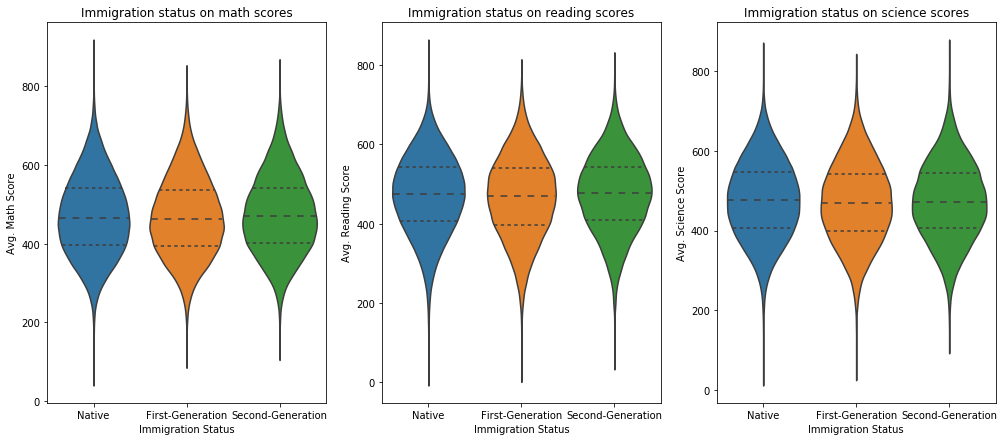

In [33]:
plt.figure(figsize = [17, 7])
order = ['Native', 'First-Generation', 'Second-Generation']

plt.subplot(1, 3, 1)
sb.violinplot(x = pisa_clean['Immigration Status'], y = pisa_clean['Avg. Math Score'],
              inner = "quartile", order=order);
plt.title('Immigration status on math scores');

plt.subplot(1, 3, 2)
sb.violinplot(x = pisa_clean['Immigration Status'], y = pisa_clean['Avg. Reading Score'],
              inner = "quartile", order=order);
plt.title('Immigration status on reading scores');

plt.subplot(1, 3, 3)
sb.violinplot(x = pisa_clean['Immigration Status'], y = pisa_clean['Avg. Science Score'],
              inner = "quartile", order=order);
plt.title('Immigration status on science scores');

We can see that the 'immigration status' has very little effect on performance. The 'First-Generation' has slightly lower average results than the other two.

#### 9. Analysis

What about the cultural background of the family? Does it have an influence on the performance of the students if the parents come from different cultural backgrounds?

My plan was to use a swarmplot. But because of the size of the data, the code runs for ever. So I use a violinplot instead again.

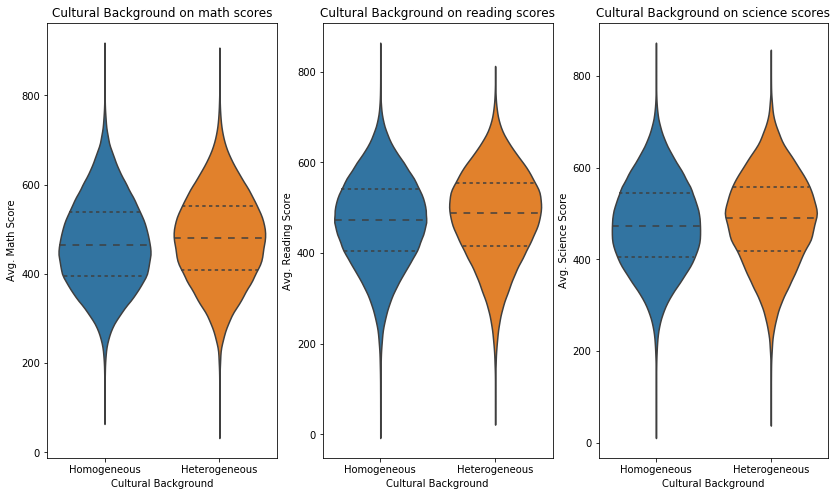

In [34]:
plt.figure(figsize = [14, 8])

plt.subplot(1, 3, 1)
sb.violinplot(x = pisa_clean['Cultural Background'], y = pisa_clean['Avg. Math Score'],
              inner = "quartile");
plt.title('Cultural Background on math scores');

plt.subplot(1, 3, 2)
sb.violinplot(x = pisa_clean['Cultural Background'], y = pisa_clean['Avg. Reading Score'],
              inner = "quartile");
plt.title('Cultural Background on reading scores');

plt.subplot(1, 3, 3)
sb.violinplot(x = pisa_clean['Cultural Background'], y = pisa_clean['Avg. Science Score'],
              inner = "quartile");
plt.title('Cultural Background on science scores');

We can see that the cultural background of the family can have an influence on school performance. According to our graph, a heterogeneous family composition seems to have a positive effect on performance.

## Multivariate Exploration

#### 10. Analysis

We will now go a little deeper into the analysis. In addition to our previous findings on the influence of family on school performance, we will add the variable sex to identify possible differences between boys and girls.

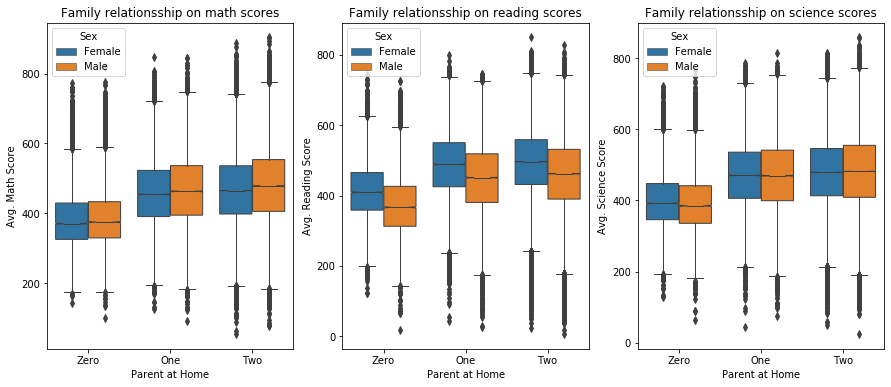

In [35]:
plt.figure(figsize = [15, 6])

order = ['Zero', 'One', 'Two']
plt.subplot(1, 3, 1)
sb.boxplot(x = pisa_clean['Parent at Home'], y = pisa_clean['Avg. Math Score'], hue = pisa_clean['Sex'], 
           order=order, notch=True, width=0.8,
           linewidth=1);
plt.title('Family relationsship on math scores');

plt.subplot(1, 3, 2)
sb.boxplot(x = pisa_clean['Parent at Home'], y = pisa_clean['Avg. Reading Score'], hue = pisa_clean['Sex'],
           order=order, notch=True, width=0.8,
           linewidth=1);
plt.title('Family relationsship on reading scores');

plt.subplot(1, 3, 3)
sb.boxplot(x = pisa_clean['Parent at Home'], y = pisa_clean['Avg. Science Score'], hue = pisa_clean['Sex'],
           order=order, notch=True, width=0.8,
           linewidth=1);
plt.title('Family relationsship on science scores');

We can observe that girls and boys, regardless of gender, are both strongly influenced in their school performance by their family background.

#### 11. Analysis

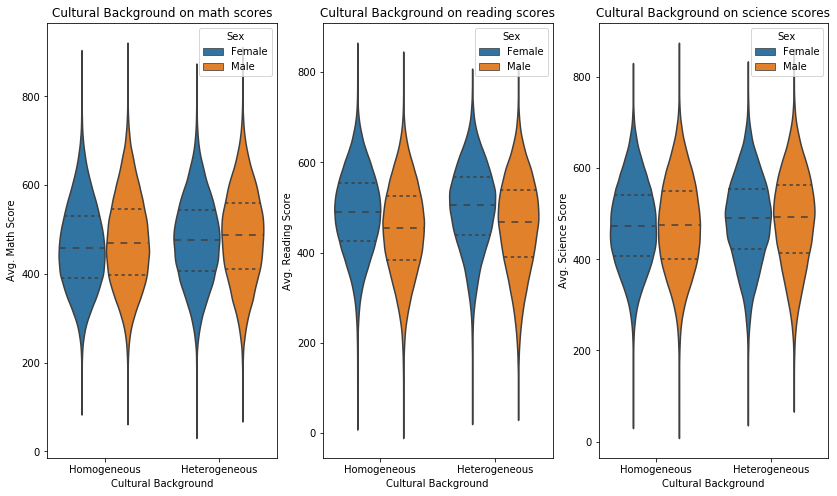

In [36]:
plt.figure(figsize = [14, 8])

plt.subplot(1, 3, 1)
sb.violinplot(x = pisa_clean['Cultural Background'], y = pisa_clean['Avg. Math Score'], hue = pisa_clean['Sex'],
              inner = "quartile");
plt.title('Cultural Background on math scores');

plt.subplot(1, 3, 2)
sb.violinplot(x = pisa_clean['Cultural Background'], y = pisa_clean['Avg. Reading Score'], hue = pisa_clean['Sex'],
              inner = "quartile");
plt.title('Cultural Background on reading scores');

plt.subplot(1, 3, 3)
sb.violinplot(x = pisa_clean['Cultural Background'], y = pisa_clean['Avg. Science Score'], hue = pisa_clean['Sex'],
              inner = "quartile");
plt.title('Cultural Background on science scores');

The same can be applied to the cultural background of the family.

#### 12. Analysis

Now we want to analyze the influence of the 'Immigration Status' on the score even more by adding the variable country code. I will limit myself here to the European countries in the data set.

In [37]:
european_countries = ['Italy', 'Spain', 'United Kingdom', 'Switzerland',
                    'Finland', 'Belgium', 'Denmark', 'Slovenia',
                    'Portugal', 'Czech Republic', 'Bulgaria', 'Luxembourg',
                    'Russian Federation', 'Greece', 'Romania', 'Ireland', 'Croatia',
                    'Germany', 'Turkey', 'Hungary', 'Estonia', 'Sweden', 'Norway', 'Serbia',
                    'Slovak Republic', 'Lithuania', 'France', 'Poland', 'Netherlands', 'Latvia']

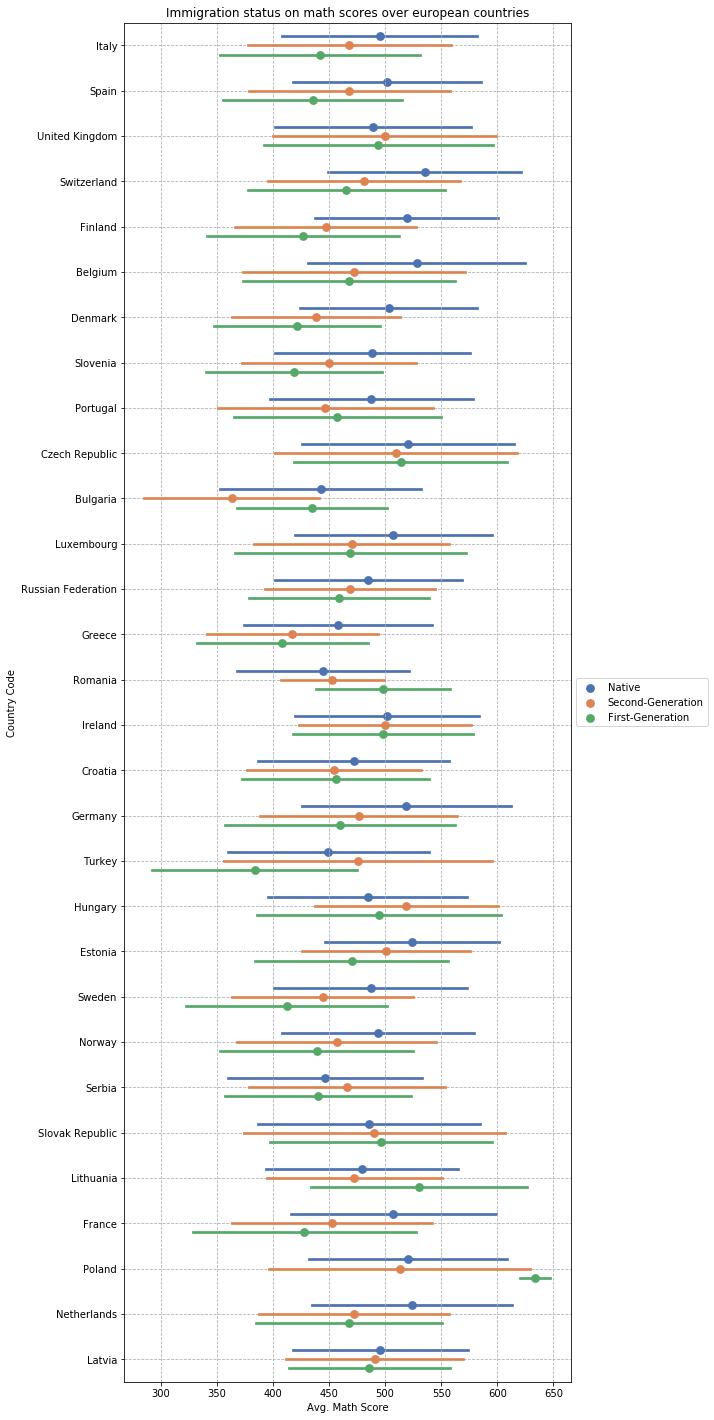

In [38]:
plt.figure(figsize = [8, 25])

sb.pointplot(x = pisa_clean['Avg. Math Score'], y = pisa_clean['Country Code'], hue = pisa_clean['Immigration Status'],
             linestyles = '', dodge = 0.4, ci = 'sd', palette = 'deep', order = european_countries);
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid(ls = '--')
plt.title('Immigration status on math scores over european countries');

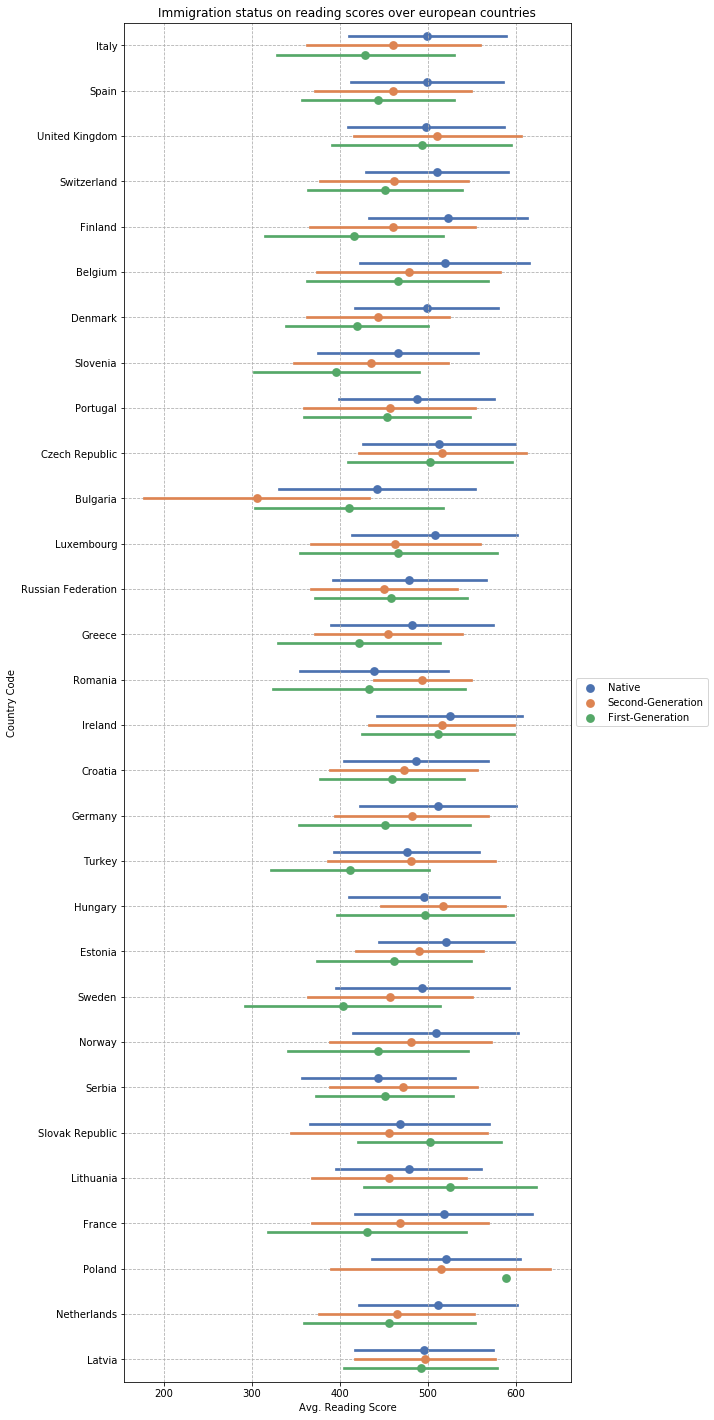

In [39]:
plt.figure(figsize = [8, 25])

sb.pointplot(x = pisa_clean['Avg. Reading Score'], y = pisa_clean['Country Code'], hue = pisa_clean['Immigration Status'],
             linestyles = '', dodge = 0.4, ci = 'sd', palette = 'deep', order = european_countries);
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid(ls = '--')
plt.title('Immigration status on reading scores over european countries');

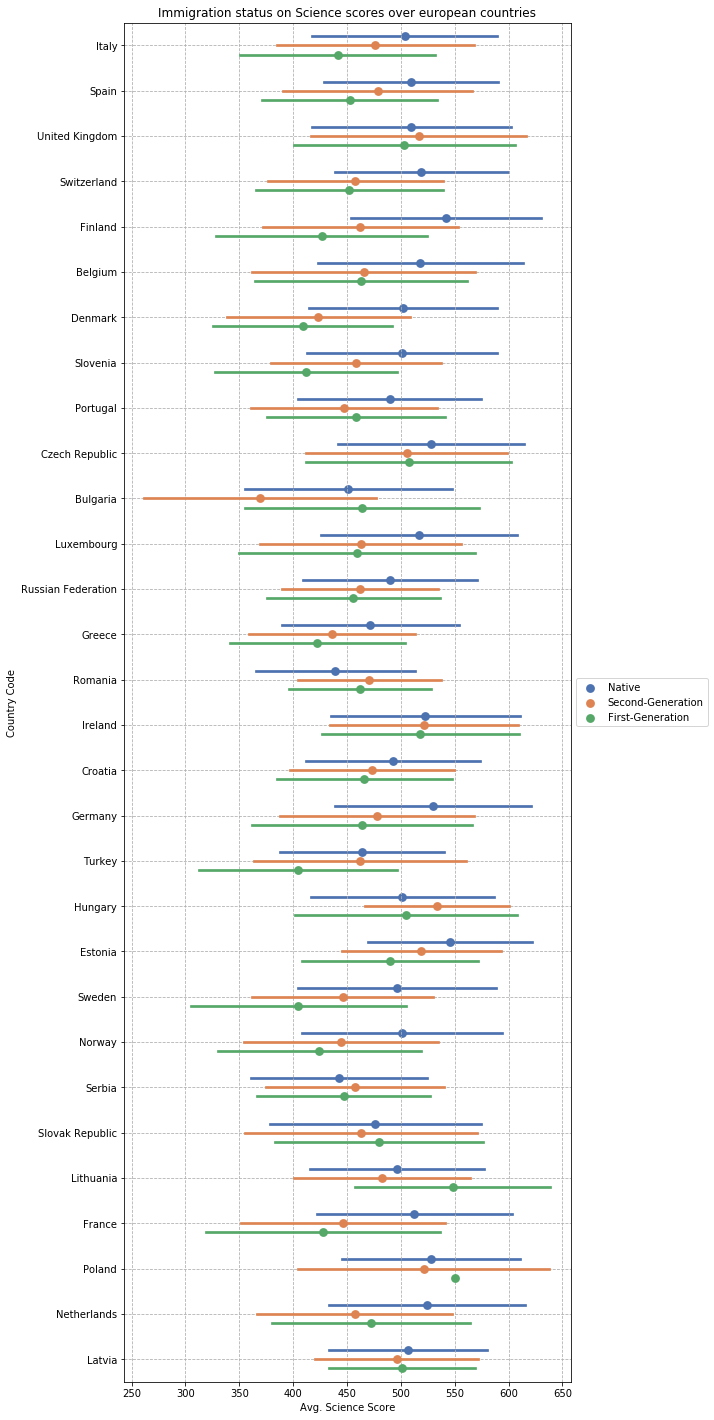

In [40]:
plt.figure(figsize = [8, 25])

sb.pointplot(x = pisa_clean['Avg. Science Score'], y = pisa_clean['Country Code'], hue = pisa_clean['Immigration Status'],
             linestyles = '', dodge = 0.4, ci = 'sd', palette = 'deep', order = european_countries);
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid(ls = '--')
plt.title('Immigration status on Science scores over european countries');

From the previous three graphs, it can be seen that equal opportunities seem to depend strongly on the European country in question. For example, the difference in the scores between 'native' and non-native in Germany is not so high. In Bulgaria, however, the difference is very significant.

It is also interesting to note that in our previous analysis we found little difference between immigration status and score. If we add the variable country code, we see that it can vary a lot from country to country.

## Conclusion

In summary, it can be said that the individual characteristics analysed (age, gender, family situation, immigration status and cultural background) always have a certain share in the results.

For example, we could observe that the youngest participants in the data set had significantly worse results.
We also see that girls and boys seem to have different strengths and weaknesses depending on their sex.

The role of parents also plays a very important role. If both parents are at home, the students achieve significantly better results than if there are no parents in the house. Students with parents from different cultural backgrounds also seem to be slightly better.

At first glance, the migration background did not seem to have much influence on the results. But if you look at the individual European countries in comparison, you can see that it has different influences from country to country. The immigrant background can be a significant hurdle to good results, depending on the country you grow up in.